<a href="https://colab.research.google.com/github/DSlaughter01/machine_learning/blob/main/ensemble_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6: Homework 2

----------------------------------------------------
Machine Learning                      



*   Daniel Slaughter
*   Devashish Sonowal




----------------------------------------------------

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

The aim of this second HW is to implement and analyse the performance of ensemble methods. To do this, we will work with the Pima Diabetes database (described in the next section) and you will have to complete the following exercises.

## 1. Load and prepare the data

For this lab session, let's work over the  [Pima Diabetes data set](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) a binary classification problem aimed to diabetes disease from a  several medical predictors: the number of pregnancies the patient has had, their BMI, insulin level, age, and so on..

The next cell code loads and preprocesses the data for you by
* Loading the dataset
* Creating training and testing partitions with the 75% and 25% of the original data. The seed is set to $0$ to reproduce the results.
* Normalizing the data to zero mean and unitary standard deviation

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()

# Initialize the random generator seed to compare results
np.random.seed(0)

import pandas as pd
data = pd.read_csv('diabetes.csv')
data.head()

X = data.values[:,:-1]
Y = data.values[:,-1]

# Create data partitions
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=0)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Saving diabetes.csv to diabetes.csv


Along the notebook, you have to analyze the model for different parameter values and ranges. Here, you have the definition of these values. For some of them, we have defined a debugging values (to seep up the implementation of the algorithms), but please use the final values to run a final version of the notebook and analyze the results.

In [ ]:
# Parameter for code debugging
T=20
n_iter = 10

# Final parameters for analysis results
T=50
n_iter = 50

# Common parameters
max_depth = 2
n_perc = 0.25
range_perc = np.logspace(-2, -0.3, 20)
range_feat = np.arange(0.1, 1.01, 0.1)

## 2. Bagging methods (4 points)


### Exercise 2.1  (1 point)


#### **a)**
Use the model `BaggingClassifier` of sklearn to train an ensemble of `t` trees with a subsamplig rate of `n_perc` (`max_samples` = `n_perc`) considering each tree has a maximum depth of `max_depth` and use the default values for the remaining parameters.

Analyze the evolution of the train and test accuracy for t from 1 to T.

Later, run the code several times, why do you get different results?


#### Solution


The highest training accuracy was 0.785, attained with t = 22
The highest test accuracy was 0.781, attained with t = 10


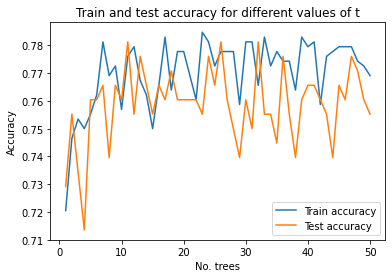

In [ ]:
#@title Evolution of accuracy with the number of trees (t)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# SECTION GOAL: Train the BaggingClassifier ensemble using t trees (from 1 to T) and explore train
# and test accuracy over these values.

# Notes:
# The BaggingClassifier function automatically performs the base_estimator over random subsets of the data
# The default base_estimator is DecisionTreeClassifier, and it's here we specify max depth

# Initiate lists for plotting
t_list = np.arange(1, T+1)
train_score_list, test_score_list = [], []

# Loop over values of t from 1 to T (defined above)
# For each value of t, compute the train and test scores, and update the lists above
for t in t_list:

  # We are using t trees, so n_estimators = t
  # define the model and train (.fit) it
  clf_bag = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = max_depth),
                              n_estimators = t,
                              max_samples = n_perc).fit(X_train, Y_train)

  # Update the lists to include scores over the test and training data
  train_score_list.append(clf_bag.score(X_train, Y_train))
  test_score_list.append(clf_bag.score(X_test, Y_test))

# Print the value of t at the maximum accuracy for test and training data
print(f'\nThe highest training accuracy was {"{:.3f}".format(np.max(train_score_list))}, attained with t = {train_score_list.index(max(train_score_list))}')
print(f'The highest test accuracy was {"{:.3f}".format(np.max(test_score_list))}, attained with t = {test_score_list.index(max(test_score_list))}')

#print('The full range of accuracies is shown in the table below\n')

# Display accuracies in a pandas dataframe
# ar = np.array([t_list, train_score_list, test_score_list])
# columns = ['t', 'Training accuracy', 'Testing accuracy']
# tab = pd.DataFrame(data = np.transpose(ar), columns = columns)
# print(tab)

# Plot the results
plt.plot(t_list, train_score_list, label = 'Train accuracy')
plt.plot(t_list, test_score_list, label = 'Test accuracy')
plt.title('Train and test accuracy for different values of t')
plt.xlabel('No. trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


*Later, run the code several times, why do you get different results?*

We get different results because of the random choice of how the subsample is chosen by the ensemble (BaggingClassifier).


#### **b)**

Although the final error tends to be the same, we see that these curves are very noisy and there are many differences between them (mainly at the beginning).

To really analyze the model performance, repeat this experiment for `n_iter` runs, average the results and analyze the results:

* How does the ensemble accuracy behave in mean and standard deviation  as the number of trees increases?. Think about the best way to plot the results to analyze this behavour.


* Would we be able to further improve the (averaged) accuracy by adding more trees? Can we get any additional improvement?

* Do you think there is a risk of overfitting if we add more trees?


#### Solution

[[0.67881944 0.71701389 0.76388889 0.75347222 0.76909722 0.75520833
  0.75520833 0.79166667 0.77777778 0.77604167 0.77951389 0.77777778
  0.77256944 0.77951389 0.76736111 0.76388889 0.76736111 0.77604167
  0.76388889 0.76041667 0.76736111 0.77430556 0.76909722 0.765625
  0.77430556 0.77430556 0.76388889 0.77951389 0.77777778 0.77083333
  0.77951389 0.78472222 0.78125    0.77951389 0.77951389 0.77951389
  0.77777778 0.78819444 0.77430556 0.77430556 0.77256944 0.77604167
  0.77256944 0.78298611 0.765625   0.76909722 0.77777778 0.77951389
  0.76736111 0.77777778]
 [0.69965278 0.71875    0.77083333 0.77604167 0.76215278 0.76909722
  0.77777778 0.76215278 0.765625   0.77256944 0.76215278 0.75
  0.77256944 0.77430556 0.76909722 0.78472222 0.77430556 0.78645833
  0.76736111 0.765625   0.77256944 0.77256944 0.78472222 0.77256944
  0.76736111 0.76909722 0.77777778 0.77256944 0.76909722 0.76736111
  0.77777778 0.77430556 0.77951389 0.77604167 0.77430556 0.77604167
  0.77951389 0.76388889 0.78125

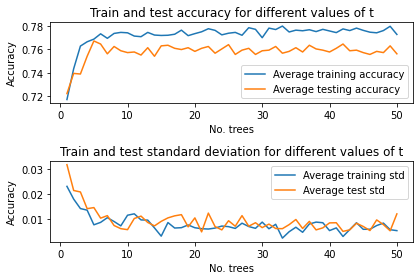

In [ ]:
# Run it n_iter times, average the results

# Total accuracies
total_train_acc, total_test_acc = [], []

# Same loop as before, this time adding each list of accuracy scores
for i in range(10):
  train_score_list, test_score_list = [], []

  # t_list has already been defined at the start of the file
  for t in t_list:
    # define and fit (train) model
    clf_bag = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = max_depth),
                                n_estimators = t,
                                max_samples = n_perc).fit(X_train, Y_train)
    train_score_list.append(clf_bag.score(X_train, Y_train))
    test_score_list.append(clf_bag.score(X_test, Y_test))

  # Append these to total_train_acc and total_test_acc
  total_train_acc.append(train_score_list)
  total_test_acc.append(test_score_list)

# Convert to NumPy arrays for calculations
total_train_acc = np.array(total_train_acc)
total_test_acc = np.array(total_test_acc)
print(total_train_acc)

# Calculate mean and standard deviation
train_mean, test_mean = np.mean(total_train_acc, axis = 0), np.mean(total_test_acc, axis = 0)
train_std, test_std = np.std(total_train_acc, axis = 0), np.std(total_test_acc, axis = 0)
print(train_mean)

# Display accuracies in a pandas dataframe
#ar = np.array([t_list, train_mean, train_std, test_mean, test_std])
#columns = ['t', 'Ave. train accuracy', 'Training std', 'Ave. test accuracy', 'Test std']
#tab = pd.DataFrame(data = np.transpose(ar), columns = columns)
#print(tab)

# Print the value of t at the maximum accuracy for test and train data
print(f'\nThe highest training accuracy was {"{:.3f}".format(np.max(train_mean))}, attained with {list(train_mean).index(max(train_mean))} trees')
print(f'The highest test accuracy was {"{:.3f}".format(np.max(test_mean))}, attained with {list(test_mean).index(max(test_mean))} trees')
print(f'The lowest training standard deviation was {"{:.3f}".format(np.min(train_std))}, attained with {list(train_std).index(min(train_std))} trees')
print(f'The lowest test standard deviation was {"{:.3f}".format(np.min(test_std))} attained using {list(test_std).index(min(test_std))} trees')


# Plot the results
"""plt.subplot(211)
plt.plot(t_list, train_mean, label = 'Average training accuracy')
plt.plot(t_list, test_mean, label = 'Average testing accuracy')
plt.title('Train and test accuracy for different values of t')
plt.xlabel('No. trees')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(212)
plt.plot(t_list, train_std, label = "Average training std")
plt.plot(t_list, test_std, label = "Average test std")
plt.title('Train and test standard deviation for different values of t')
plt.xlabel('No. trees')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()"""

## Discussion of the questions

## Trends:
  ### STD
As we increase the number of trees, the standard deviation declines rapidly at first, and slowly after that. The test and training stds are broadly in line with each other.
  ### Test accuracy
As we increase the number of trees from 1 to around 6 (in our measurements), training accuracy and test accuracy increases. Test accuracy then plateaus (or even decreaseas slightly, and training accuracy rises very slowly
  ### Relationship between test accuracy and standard deviation:
The point at which the gradient of the curve slows dramatically is roughly the same for both standard deviation and accuracy - between 3 and 6. Accuracy and standard deviation appear to show an inverse relationship - results become more consistent, and also more accurate, as we increase the number of trees from 1 to 6, but beyond this point our test improvements are limited.
## Overfitting:
There is no risk of overfitting. In general test accuracy is not decreased with more trees, and this increase only results in a plateau. This is because the variance is decreased with BaggingClassifier as opposed to a single decision tree, limiting the overall error, as the weak learners used in the bootstrap aggregation may generalise better, as they do not overfit
## Increasing accuracy
We do not get any improvement in accuracy from adding more trees after our max accuracy of 6 trees, so to get higher test accuracy, we would have to look at changing other parameters. For example, we could find the optimim value of max_depth - running this at max_depth = 4 led to around 0.90 test accuracy for t = 6, which was our optimum number of trees for max_depth = 2 (0.76)

### Exercise 2.2 Influence of parameter `n_perc` and ensemble diversity (2 points)

For the above ensemble, analyze the behaviour of the ensemble for different values of `max_samples` (use the range of values defined in `range_perc`) and analyze the performances over the train and test partitions. Compare them with that of a single decision tree (with `max_depth`) also trained with `max_samples` samples. For both approaches, run  `n_iter` iterations and average the results to obtain representative performance curves.


#### **a)** Analyze the results and answer the following questions:
* What is the advantage of the ensemble compared to a stand-alone tree?

* Is this advantage equal for any value of `max_samples`?


#### Solution


The highest training accuracy was 0.773, attained with a percentage of 16
The highest test accuracy was 0.767, attained with a percentage of 11
The lowest training standard deviation was 0.007, attained with a percentage of 17
The lowest test standard deviation was 0.009 attained with a percentage of 16


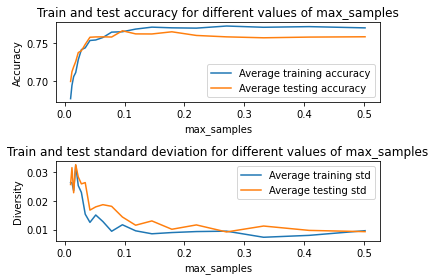

In [ ]:
#@title Influence of max_samples
# Changing per as defined in range_perc

## Changing the value of max_samples to measure its effect on accuracy
# Total accuracies
total_train_acc, total_test_acc = [], []

# Loop over range_perc
for i in range(n_iter):
  train_score_list, test_score_list = [], []

  for j in range_perc:
    clf_bag = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = max_depth),
                                max_samples = j).fit(X_train, Y_train)

    train_score_list.append(clf_bag.score(X_train, Y_train))
    test_score_list.append(clf_bag.score(X_test, Y_test))

  # Append these to total_train_acc and total_test_acc
  total_train_acc.append(train_score_list)
  total_test_acc.append(test_score_list)

# Convert to NumPy arrays for calculations
total_train_acc = np.array(total_train_acc)
total_test_acc = np.array(total_test_acc)

# Calculate mean and standard deviation
train_mean, test_mean = np.mean(total_train_acc, axis = 0), np.mean(total_test_acc, axis = 0)
train_std, test_std = np.std(total_train_acc, axis = 0), np.std(total_test_acc, axis = 0)

print(f'\nThe highest training accuracy was {"{:.3f}".format(np.max(train_mean))}, attained with a percentage of {list(train_mean).index(max(train_mean))}')
print(f'The highest test accuracy was {"{:.3f}".format(np.max(test_mean))}, attained with a percentage of {list(test_mean).index(max(test_mean))}')
print(f'The lowest training standard deviation was {"{:.3f}".format(np.min(train_std))}, attained with a percentage of {list(train_std).index(min(train_std))}')
print(f'The lowest test standard deviation was {"{:.3f}".format(np.min(test_std))} attained with a percentage of {list(test_std).index(min(test_std))}')

# Plot the results
plt.subplot(211)
plt.plot(range_perc, train_mean, label = 'Average training accuracy')
plt.plot(range_perc, test_mean, label = 'Average testing accuracy')
plt.title('Train and test accuracy for different values of max_samples')
plt.xlabel('max_samples')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(212)
plt.plot(range_perc, train_std, label = 'Average training std')
plt.plot(range_perc, test_std, label = 'Average testing std')
plt.title('Train and test standard deviation for different values of max_samples')
plt.xlabel('max_samples')
plt.ylabel('Diversity')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#@title Single Decision Tree
## Compute train and test value for a single decision tree

single_train_acc, single_test_acc = [], []

for i in range(n_iter):
  clf_tree = DecisionTreeClassifier(max_depth = max_depth).fit(X_train, Y_train)
  single_train_acc.append(clf_tree.score(X_train, Y_train))
  single_test_acc.append(clf_tree.score(X_test, Y_test))

single_train_acc_mean = np.mean(np.array(single_train_acc))
single_test_acc_mean = np.mean(np.array(single_test_acc))
single_train_std = np.std(np.array(single_train_acc))
single_test_std = np.std(np.array(single_test_acc))

print(f'training mean for one tree: {single_train_acc_mean}')
print(f'test mean for one tree: {single_test_acc_mean}')
print(f'training standard deviation for one tree: {single_train_std}')
print(f'test standard deviation for one tree: {single_test_std}')

training mean for one tree: 0.7482638888888887
test mean for one tree: 0.75
training standard deviation for one tree: 1.1102230246251565e-16
test standard deviation for one tree: 0.0


# Discussion of the questions
### Advantage:
The ensemble decreases the variance of the test data predictions, which reduces the risk of overfitting. If we have n independent trees, for which the variance is sigma^2, the average variance of all of these is (sigma^2)/n. Therefore the variance is decreased when we use more trees, reducing the risk of overfitting. Since the mean squared error is calculated through bias^2 + variance, reducing the variance also reduces the error, provided the bias doesn't increase.
Usually, increasing model complexity increases the variance and decreases the bias, so the ensemble allows us to increase complexity without increasing the variance, therefore leading to a lower MSE.
### Is it equal everywhere?
No, as when we increase the number of `max_samples` throughout `range_perc`, the variance also decreases, so higher values of `max_samples` throughout this range are benefited more.


#### **b)** Now analyze the **diversity** among their base learners' outputs for different `max_samples` rates.

You can analyze this diversity by measuring the correlation among the learners' outputs over either the training  or test data. The following code cell includes a function to compute this diversity.

Finally, analyze the results. Which is better, a high or low diversity?

To answer this question, it can be interesting to jointly analyze the diversity and the ensemble accuracy for different `max_samples` values. And do not forget to average your results for different runs.

In [ ]:
def computeDiversity(clf, X):

  '''clf: sklearn bagged ensemble method (such as BaggingClassifier)
     X : observation data matrix'''

  T = len(clf.estimators_)
  f_train = np.zeros((T,X.shape[0]))
  for t in range(T):
    f_train[t,:] = clf.estimators_[t].predict_proba(X[:,clf.estimators_features_[t]])[:,1] + 1e-6*np.random.randn(X.shape[0])

  Matrix_corr = np.corrcoef(f_train)
  corrValues = np.triu(Matrix_corr, k=1)
  corrValues = corrValues[np.nonzero(corrValues)]
  Diversity = 1-np.abs(np.mean(corrValues))
  return Diversity


#### Solution

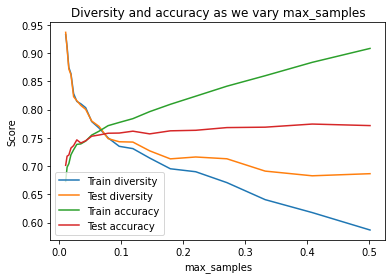

In [ ]:
# Initialise lists
sample_div_train, sample_div_test = [], []
sample_score_train, sample_score_test = [], []

for i in range(n_iter):
  # Lists for each loop
  tr_d, te_d = [], []
  tr_s, te_s = [], []

  for j in range_perc:

    # if max_samples is a float, we draw max_samples * X.shape[0] samples
    clf = BaggingClassifier(max_samples = j).fit(X_train, Y_train)

    # Diversity for this iteration and no. samples
    tr_d.append(computeDiversity(clf, X_train))
    te_d.append(computeDiversity(clf, X_test))

    # Score for this iteration and no. samples
    tr_s.append(clf.score(X_train, Y_train))
    te_s.append(clf.score(X_test, Y_test))

  # Append iteration list to overall list
  sample_div_train.append(tr_d)
  sample_div_test.append(te_d)
  sample_score_train.append(tr_s)
  sample_score_test.append(te_s)

# Convert to NumPy arrays for calculations
sample_div_train, sample_div_test = np.array(sample_div_train), np.array(sample_div_test)
sample_score_train, sample_score_test = np.array(sample_score_train), np.array(sample_score_test)

# Calculate mean and standard deviation
mean_train_div, mean_test_div = np.mean(sample_div_train, axis = 0), np.mean(sample_div_test, axis = 0)
mean_train_acc, mean_test_acc = np.mean(sample_score_train, axis = 0), np.mean(sample_score_test, axis = 0)

# Plot the results to show correlation
plt.plot(range_perc, mean_train_div, label = 'Train diversity')
plt.plot(range_perc, mean_test_div, label = 'Test diversity')
plt.plot(range_perc, mean_train_acc, label = 'Train accuracy')
plt.plot(range_perc, mean_test_acc, label = 'Test accuracy')
plt.legend()
plt.xlabel('max_samples')
plt.ylabel('Score')
plt.title('Diversity and accuracy as we vary max_samples')
plt.show()

# Discussion of the questions
As the number of maximum samples increases, diversity decreases while accuracy increases. This relationship is more pronounced for the training data, which is normal, because as we increase the number of samples we include more and more training data. This does not necessarily lead to an increase in test accuracy, which stays between 0.7 and 0.8. This is because of overfitting. A high enough diversity ensures that we get the best test accuracy.

#### **c)** Optimum selection of `max_samples` parameter

From the above results, it is clear that the selection of the `max_samples` value is critical to obtain good performance in the ensemble. Select this value by cross validation.

#### Solution

In [ ]:
#@title CV of max_samples

from sklearn.model_selection import GridSearchCV

max_samples_params = {'max_samples': range_perc}

max_samples_gs = GridSearchCV(estimator = BaggingClassifier(),
                              cv = 10,
                              param_grid = max_samples_params,
                              scoring = 'accuracy')

max_samples_gs.fit(X_train, Y_train)

opt_samples = max_samples_gs.best_params_['max_samples']
opt_score = max_samples_gs.score(X_test, Y_test)

print(f'The best value for the parameter max_sample for BaggingClassifier: {opt_samples}')
print(f'The test accuracy at this point is {opt_score}')


The best value for the parameter max_sample for BaggingClassifier: 0.03442247595686089
The test accuracy at this point is 0.7447916666666666


### Exercise 2.3 Can we increase the ensemble diversity with other schemes? (1 point)



#### **a)** Exploring other diversity strategies

A very simple way to increase diversity is to do data and feature subsampling at the same time (subsampling the training data matrix by rows and by columns). To do this, you can use the `BaggingClassifier` class since it has another parameter `max_features` that allows to control the number or percentage of variables to use.

*Note that in previous experiments this parameter was set to $1.0$ (default value), so a none feature subsamplig has been applied*.

To analyze the influence of this kind of subsampling, now explore both the diversity and the ensemble performance and diversity for different values of `max_samples` and  `max_features` (using `range_feat`). Discuss the obtained results in comparison with those of Exercise 2.2.


#### Solution

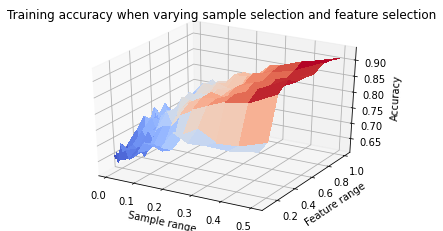

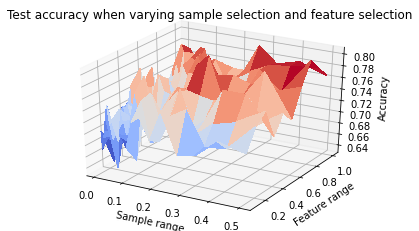

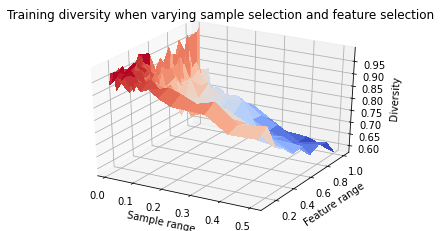

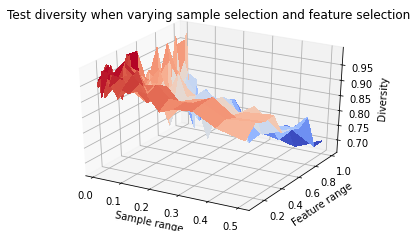

In [ ]:
# Vary both max_features using range_feat, and range_perc as before
# The goal is to measure diversity and performance

from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Initialise lists
div_train, div_test = [], []
score_train, score_test = [], []

for i in range_feat:

  d_tr, d_te = [], []
  s_tr, s_te = [], []

  for j in range_perc:

    clf = BaggingClassifier(max_samples  = j,
                            max_features = i).fit(X_train, Y_train)

    d_tr.append(computeDiversity(clf, X_train))
    d_te.append(computeDiversity(clf, X_test))
    s_tr.append(clf.score(X_train, Y_train))
    s_te.append(clf.score(X_test, Y_test))

  div_train.append(d_tr)
  div_test.append(d_te)
  score_train.append(s_tr)
  score_test.append(s_te)

div_train, div_test = np.array(div_train), np.array(div_test)
score_train, score_test = np.array(score_train), np.array(score_test)

# Plotting, in order, 3D surfaces of training accuracy, testing accuracy,
# training diversity, testing diversity, each when varying sample selection
# and feature selection

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x_ax = range_perc
y_ax = range_feat
x_ax, y_ax = np.meshgrid(x_ax, y_ax)
z_ax = score_train
surf = ax.plot_surface(x_ax, y_ax, z_ax, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('Sample range')
ax.set_ylabel('Feature range')
ax.set_zlabel('Accuracy')
plt.title('Training accuracy when varying sample selection and feature selection')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x_ax = range_perc
y_ax = range_feat
x_ax, y_ax = np.meshgrid(x_ax, y_ax)
z_ax = score_test
surf = ax.plot_surface(x_ax, y_ax, z_ax, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('Sample range')
ax.set_ylabel('Feature range')
ax.set_zlabel('Accuracy')
plt.title('Test accuracy when varying sample selection and feature selection')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x_ax = range_perc
y_ax = range_feat
x_ax, y_ax = np.meshgrid(x_ax, y_ax)
z_ax = div_train
surf = ax.plot_surface(x_ax, y_ax, z_ax, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('Sample range')
ax.set_ylabel('Feature range')
ax.set_zlabel('Diversity')
plt.title('Training diversity when varying sample selection and feature selection')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x_ax = range_perc
y_ax = range_feat
x_ax, y_ax = np.meshgrid(x_ax, y_ax)
z_ax = div_test
surf = ax.plot_surface(x_ax, y_ax, z_ax, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('Sample range')
ax.set_ylabel('Feature range')
ax.set_zlabel('Diversity')
plt.title('Test diversity when varying sample selection and feature selection')
plt.show()

In [ ]:
print(f'The highest train accuracy attained is {score_train.max()}.')
print(f'The highest test accuracy attained is {score_test.max()}.')
print(f'The highest train accuracy attained in Exercise 2.2 is {train_mean.max()}.')
print(f'The highest test accuracy attained in Exercise 2.2 is {test_mean.max()}.')


The highest train accuracy attained is 0.9322916666666666.
The highest test accuracy attained is 0.8072916666666666.
The highest train accuracy attained in Exercise 2.2 is 0.7733333333333333.
The highest test accuracy attained in Exercise 2.2 is 0.7669791666666668.


From above, it is clear than changing both `max_samples` and `max_features` lead to a greater increase in diversity as compared to Exercise 2.2. This results in better ensemble performance as evident from the cell above, with this increase in accuracy being present in both train and test data, with the greatest effect on the former (0.16 as opposed to 0.04)

#### **b)** Optimum selection of `max_samples` and `max_features` parameter

Now, to complete the desing of the Bagging classfier, select by cross validation the values of  `max_samples` and `max_features` and compare the result with that from Exercise 2.2.c.

#### Solution

In [ ]:
sf_params = {'max_samples': range_perc, 'max_features': range_feat}

sf_gs = GridSearchCV(BaggingClassifier(),
                     param_grid = sf_params,
                     scoring = 'accuracy',
                     cv = 10)

sf_gs.fit(X_train, Y_train)

opt_params_sf = sf_gs.best_params_
opt_score_sf = sf_gs.score(X_test, Y_test)
print(f'The best parameters for BaggingClassifier when varying samples and features are: {opt_params_sf}')
print(f'The test accuracy at this point is {opt_score_sf}')

if opt_score_sf > opt_score:
  print(f'Varying both max_features and max_samples was more accurate than just varying max_samples, by {"{:.2f}".format((opt_score_sf - opt_score)*100)}%')
elif opt_score_sf < opt_score:
  print(f'Varying both max_features and max_samples was less accurate than just varying max_samples, by {"{:.2f}".format((opt_score - opt_score_sf)*100)}%')
else:
  print("Varing both max_features and max_samples made no difference compared with just varying max_samples")


The best parameters for BaggingClassifier when varying samples and features are: {'max_features': 0.8, 'max_samples': 0.27013381211330045}
The test accuracy at this point is 0.7395833333333334
Varying both max_features and max_samples was less accurate than just varying max_samples, by 0.52%


## 3. Boosting methods (3 points)

### Exercise 3.1  (1.5 points)

#### **a)** Real AdaBoost

Uses the `AdaBoostClassifier` model to train a set of `T` decision trees with `max_depth` and analyze their train and test accuracy vs. the number of trees (from 1 to `T`). Use the the implementation of Real Adaboost (`algorithm` = `SAMME.R`).

Discuss the results and answer the following questions:
* Can I add as many trees as I want without incurring in overfitting problems?
* Can I stop adding learners when the train accuracy is $100\%$?

Compare this results and discussion with that of the Bagging ensemble of Exercise 2.1.

#### Solution


The highest training accuracy was 0.970, attained with 49 samples
The highest test accuracy was 0.807, attained with 15 samples


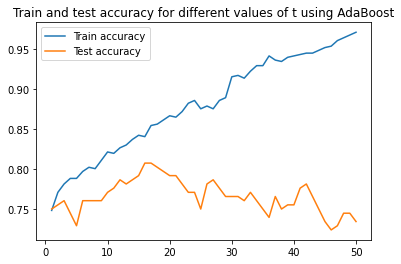

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# base_estimator should be the same as before, with max_depth specified
# Algorithm doesn't need to be specified as this is its default setting
# We want to change the number of trees (n_estimators)

train_acc_ada, test_acc_ada = [], []

for tree in t_list:
  clf_ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = max_depth),
                    n_estimators = tree).fit(X_train, Y_train)

  train_acc_ada.append(clf_ada.score(X_train, Y_train))
  test_acc_ada.append(clf_ada.score(X_test, Y_test))

# Print the number of trees where maximum accuracy was achieved
print(f'\nThe highest training accuracy was {"{:.3f}".format(np.max(train_acc_ada))}, attained with {list(train_acc_ada).index(max(train_acc_ada))} samples')
print(f'The highest test accuracy was {"{:.3f}".format(np.max(test_acc_ada))}, attained with {list(test_acc_ada).index(max(test_acc_ada))} samples')

# Plot the results
plt.plot(t_list, train_acc_ada, label = 'Train accuracy')
plt.plot(t_list, test_acc_ada, label = 'Test accuracy')
plt.title('Train and test accuracy for different values of t using AdaBoost')
plt.legend()
plt.show()

# Discussion
Overfitting does occur - after a while, increases in accuracy relating to the training data correspond to decreases in accuracy over the testing data beyond t = 15, where the algorithm doesn't generalise well. This means that adding more and more trees until the training accuracy is 100% is not a good strategy, and can in fact result in lower test accuracy than a smaller number of trees.

The maximum test accuracy is higher here than in exercise 2.1, at 0.8, however here we have more overfitting so increasing the number of trees decreases test accuracy while increasing training accuracy, whereas in 2.1,both train and test accuracy plateau.

#### **b)** Gradient Boosting

Use the `GradientBoostingClassifier` model to train a set of T decision trees with `max_depth`  by Gradient Boosting with an exponential  cost function (`loss= 'exponential'`). Obtain the accuracy evolution with the number of learners. Besides, compare the result with the one obtained by the `AdaBoostClassifier` with `algorithm` = `SAMME.R`.

*In this case, you can explore the perfromance for 2T learners*.


#### Solution


The highest training accuracy was 0.913, attained with 98 trees
The highest test accuracy was 0.818, attained with 52 trees


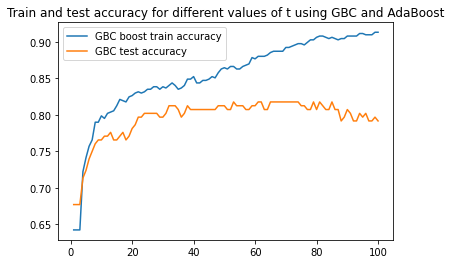

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialise list for 2T trees
train_acc_gbc, test_acc_gbc = [], []
t2_list = np.arange(1, 2*T + 1)

for trees in t2_list:
  clf_gbc = GradientBoostingClassifier(loss = 'exponential',
                                    n_estimators = trees).fit(X_train, Y_train)

  train_acc_gbc.append(clf_gbc.score(X_train, Y_train))
  test_acc_gbc.append(clf_gbc.score(X_test, Y_test))

# Find the highest value of t
print(f'\nThe highest training accuracy was {"{:.3f}".format(np.max(train_acc_gbc))}, attained with {train_acc_gbc.index(max(train_acc_gbc))} trees')
print(f'The highest test accuracy was {"{:.3f}".format(np.max(test_acc_gbc))}, attained with {test_acc_gbc.index(max(test_acc_gbc))} trees')

# Plot the results
plt.plot(t2_list, train_acc_gbc, label = 'GBC boost train accuracy')
plt.plot(t2_list, test_acc_gbc, label = 'GBC test accuracy')
plt.title('Train and test accuracy for different values of t using GBC and AdaBoost')
plt.legend()
plt.show()

# Discussion
## Accuracy
No. of trees - it takes a much larger number of trees to approach 100% training accuracy with GBC - AdaBoost reached around 0.97 training accuracy with 50 trees, whereas GBC did not reach this even after 100 trees.
Test accuracy - The maximum test accuracy for GBC and AdaBoost are around the same, but GBC required around double the amount of trees to do this. After the maximum test accuracy was achieved, accuracies remained consistently high for a long time, before dropping around t = 80.

## Overfitting
This means that GBC produced less overfitting than AdaBoost, but overfitting was still present.

#### **c)** Parameter selection

In these models the selection of the number of learners can be critical. Compute the performance of both Real Ababoost and GradientBoosting when T is selected by CV.

#### Solution

In [ ]:
# GridSearchCV on both Real Adaboost and GradientBoosting

boost_params = {'n_estimators': t_list}

ada_gs = GridSearchCV(estimator = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = max_depth)),
                      param_grid = boost_params,
                      cv = 10)

ada_gs.fit(X_train, Y_train)
ada_opt_params = ada_gs.best_params_['n_estimators']
ada_test_acc = ada_gs.score(X_test, Y_test)

g_boost_gs = GridSearchCV(estimator = GradientBoostingClassifier(loss = 'exponential'),
                          param_grid = boost_params,
                          cv = 10)

g_boost_gs.fit(X_train, Y_train)
g_boost_opt_params = g_boost_gs.best_params_['n_estimators']
g_boost_test_acc = g_boost_gs.score(X_test, Y_test)

print(f'The best parameters for AdaBoostClassifier when varying the number of estimators are: {ada_opt_params}')
print(f'The test accuracy at this point is {ada_test_acc}')
print(f'The best parameters for GradientBoostingClassifier when varying the number of estimators are: {g_boost_opt_params}')
print(f'The test accuracy at this point is {g_boost_test_acc}')

The best parameters for AdaBoostClassifier when varying the number of estimators are: 11
The test accuracy at this point is 0.7760416666666666
The best parameters for GradientBoostingClassifier when varying the number of estimators are: 17
The test accuracy at this point is 0.7760416666666666


### Exercise 3.2 (1.5 points)

Finally compare the performance of GradientBoost based models when using the
[XGBoost library](https://xgboost.readthedocs.io/en/latest/index.html), as it provides an efficient implementation with parallelization capabilities (in case we need to work with large datasets). In addition, it has a [sklearn interface](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) that allows us to easily integrate it with our code.

Like the sklearn implementation it is designed to work with decision trees, but it brings us some additional utilities:
* It allows us to do *early_stopping*: if we provide a validation set, it evaluates the performance of the set on it to decide when to stop adding new trees (avoiding overfitting effects).
* It allows to evaluate the set with a subset of the trained trees.

Check the library help to use these utilities to efficiently analyze the performance of the ensemble as a function of the number of trees and, later, to apply an early stopping criterion to select the optimal number of trees in the ensemble. In the latter case, you can use a $40\%$ of the training data for the validation subset and $10$ rounds for the early stopping criteria.

Finally, discuss about the different strategies for crossvalidating $T$ (cross-validation vs early stopping).

#### Solution

In [ ]:
import xgboost as xgb

boost_score_list = []

for tree in t2_list:
  my_booster = xgb.XGBClassifier(n_estimators = t,
                                 subsampling = 0.4)

  my_booster.fit(X_train, Y_train,
                 early_stopping_rounds = 10,
                 eval_set = [(X_test, Y_test)],
                 verbose = False)

  boost_score_list.append(my_booster.score(X_test, Y_test))

print(np.max(np.array(boost_score_list)))

0.7864583333333334


# Discussion
Cross Validation is a method for estimating the generalisation accuracy of an algorithm. Early stopping is a method for avoiding overfitting and requires a method to assess the relationship between the generalisation accuracy of the learned model and the training accuracy. Early stopping avoids overfitting, and therefore is more accurate when generalising to test datasets.
We got slightly more accurate results using early stopping as opposed to cross validation, but it should also be noted that the two can also be used in combination.

## 4. Working with unbalanced data (3 points)

To finish the homework, we are going to work with the bagging and boosting schemes but on highly unbalanced data sets. To do this the next code cell reloads the dataset, but now we are left with a subset of the positive data, so that we get an unbalance of 1:10.

In [ ]:
import pandas as pd
data = pd.read_csv('diabetes.csv')
data.head()

X = data.values[:,:-1]
Y = data.values[:,-1]

# Desbalancing the dataset
ind_1 = np.where(Y==1)[0][:50]
ind_0 = np.where(Y==0)[0]
ind = np.concatenate((ind_1,ind_0))

X = X[ind,:]
Y = Y[ind]

# Analyzing the desbalancing of the dataset
ind_1 = np.where(Y==1)[0]
ind_0 = np.where(Y==0)[0]

print(str(len(ind_1)) + ':' + str(len(ind_0)))

# Create data partitions
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=0)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

50:500


### 4.1 Performance of ensembles in unbalaced datasets (0.5 points)

To analyze the performance of bagging and boosting models, start by analyzing the performance of a Bagging set with T trees and the Real Adaboost with 2T trees. In both cases the trees must set the parameter `max_depth` to `max_depth`.
Analyze the performance in terms of accuracy and ROC/AUC.


The highest training accuracy was 0.922, attained with t = 25
The highest test accuracy was 0.935 attained with t = 29


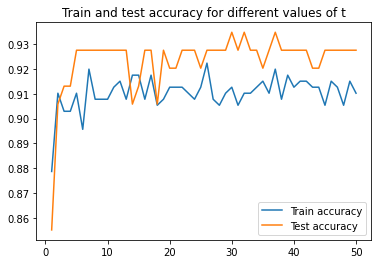

The auc is 0.76484375


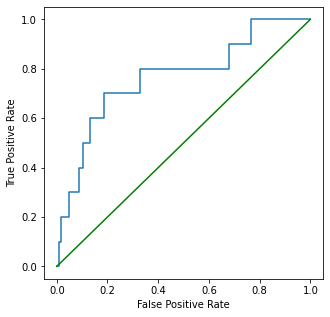

In [ ]:
#@title Bagging before correction of dataset imbalance (T trees)

# Initiate lists for plotting
t_list = np.arange(1, T+1)
train_score_list, test_score_list = [], []

# Loop over values of t from 1 to T (defined above)
# For each value of t, compute the train and test scores, and update the lists above
for t in t_list:

  # We are using t trees, so n_estimators = t
  clf_bag = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = max_depth),
                              n_estimators = t,
                              max_samples = n_perc).fit(X_train, Y_train)

  # Update the lists to include scores over the test and training data
  train_score_list.append(clf_bag.score(X_train, Y_train))
  test_score_list.append(clf_bag.score(X_test, Y_test))

# Print the value of t at the maximum accuracy for test and training data
print(f'\nThe highest training accuracy was {"{:.3f}".format(np.max(train_score_list))}, attained with t = {train_score_list.index(max(train_score_list))}')
print(f'The highest test accuracy was {"{:.3f}".format(np.max(test_score_list))} attained with t = {test_score_list.index(max(test_score_list))}')

# print('The full range of accuracies is shown in the table below\n')

# Display accuracies in a pandas dataframe
# ar = np.array([t_list, train_score_list, test_score_list])
# columns = ['t', 'Training accuracy', 'Testing accuracy']
# tab = pd.DataFrame(data = np.transpose(ar), columns = columns)
# print(tab)

# Plot the results
plt.plot(t_list, train_score_list, label = 'Train accuracy')
plt.plot(t_list, test_score_list, label = 'Test accuracy')
plt.title('Train and test accuracy for different values of t')
plt.legend()
plt.show()

# ROC_AUC
y_proba=clf_bag.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

# Plots the ROC curve using the sklearn methods
auc_imbalanced_bag=roc_auc_score(Y_test, clf_bag.predict_proba(X_test)[:, 1])
plot_sklearn_roc_curve(Y_test, y_proba)
print(f'The auc is {auc_imbalanced_bag}')


The highest training accuracy was 1.000, attained with 18 trees
The highest test accuracy was 0.906, attained with 9 trees


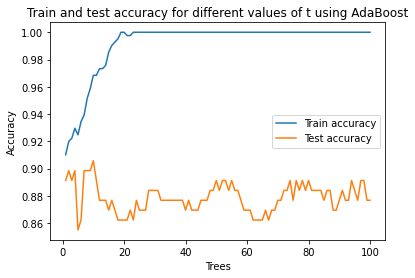

The auc is 0.78359375


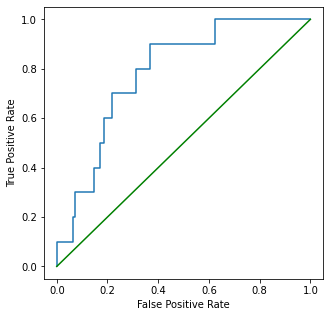

In [ ]:
#@title AdaBoost before correction of dataset imbalance (2T trees)

train_acc_ada, test_acc_ada = [], []

# use 2T trees, T=50
t_list = np.arange(1,101,1)
for tree in t_list:
  clf_ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = max_depth),
                    n_estimators = tree)
  clf_ada.fit(X_train, Y_train)

  train_acc_ada.append(clf_ada.score(X_train, Y_train))
  test_acc_ada.append(clf_ada.score(X_test, Y_test))

# Print the number of trees where maximum accuracy was achieved
print(f'\nThe highest training accuracy was {"{:.3f}".format(np.max(train_acc_ada))}, attained with {train_acc_ada.index(max(train_acc_ada))} trees')
print(f'The highest test accuracy was {"{:.3f}".format(np.max(test_acc_ada))}, attained with {test_acc_ada.index(max(test_acc_ada))} trees')

# Plot the results
plt.plot(t_list, train_acc_ada, label = 'Train accuracy')
plt.plot(t_list, test_acc_ada, label = 'Test accuracy')
plt.title('Train and test accuracy for different values of t using AdaBoost')
plt.xlabel('Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ROC_AUC
y_proba=clf_ada.predict_proba(X_test)[:, 1]
auc_imbalanced_ada = roc_auc_score(Y_test, clf_ada.predict_proba(X_test)[:, 1])

# Plots the ROC curve using the sklearn methods
plot_sklearn_roc_curve(Y_test, y_proba)
print(f'The auc is {auc_imbalanced_ada}')

### 4.2 Correction of the dataset unbalancing  (2.5 points)

We now want to improve the performance of these sets by correcting the effect of dataset unbalancing, so that we can better learn the distribution of the positive versus negative class. For this purpose, the following approaches are commonly used:
* **Correction by subsampling**, sampling the training set so that we randomly either include repeated samples from the minority class or undersmapling the majority class and get to equalize the proportions between the two classes.
* **Correction by weighting the cost function**. In this case if there have $N_0$ and $N_1$ samples from each class, the cost function is modified so that the data from class $0$ are weighted by $1/N_0$ and those from class $1$ by $1/N_1$. In this way, the data of each class are weighted by the number of samples in them and in the final cost both classes are weighted equally even if there are different numbers of samples in them.

Use both the subsampling criteria to correct the imbalance in the Bagging ensemble and the cost function weigthing for the AdaBoost algorithm. To do this, you can either modify the sklearn implementations or use the Bagging and Boosting functions included in the theory notebook. Compare the results of these modified versions  (in ROC/AUC) with the performance obtained in the previous section.

In the case of applying subsampling in the bagging ensemble, compute the total number of samples you want (according to `max_samples`parameter) and then include a half of them from each one of the classes.

Why do you think we do (or not) get to improve the performance of the original versions?

In [ ]:
## CREATING BALANCED DATASETS ##

# The "Imbalanced-learn" library imblearn can help us here

# Method 1: including repeats from the minority class (oversampling)
# We can import this function, which duplicates random points to increase the number of points used in the minority class
# According to the imblearn site:

""" One way to fight this issue is to generate new samples in the classes which are under-represented.
The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples.
The RandomOverSampler offers such scheme:"""

# Alternatives are SMOTE and ADASYN

from imblearn.over_sampling import RandomOverSampler

X_train_over, Y_train_over = RandomOverSampler(random_state = 0).fit_resample(X_train, Y_train)

# Check we have a balanced set
over_ind_1 = np.where(Y_train_over==1)[0]
over_ind_0 = np.where(Y_train_over==0)[0]
print(f'The ratio using oversampling is now: {len(over_ind_1)}:{len(over_ind_0)}')

# Method 2: undersampling the majority class
# Similarly, imblearn has a function to randomly select a subset of the majority dataclass (undersampling)

from imblearn.under_sampling import RandomUnderSampler

X_train_under, Y_train_under = RandomUnderSampler(random_state = 0).fit_resample(X_train, Y_train)

# Check we have a balanced set
under_ind_1 = np.where(Y_train_under==1)[0]
under_ind_0 = np.where(Y_train_under==0)[0]
print(f'The ratio using undersampling is now: {len(under_ind_1)}:{len(under_ind_0)}')

# Clearly when undersampling, we reduce the number of total data points, but these are still all
# individual real datapoints. Oversampling allows us to use all of the real datapoints in the
# majority class by repeating some datapoints in the minority class.

The ratio using oversampling is now: 372:372
The ratio using undersampling is now: 40:40



The highest training accuracy was 0.837, attained with t = 32
The highest test accuracy was 0.797, attained with t = 3


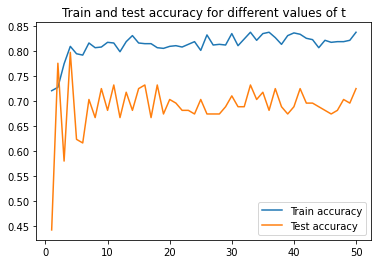

The auc is 0.7660156249999999


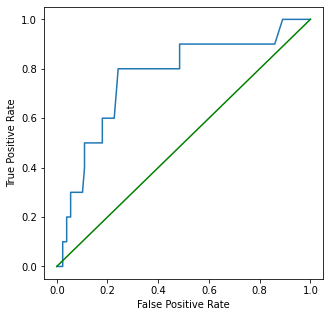

In [ ]:
#@title Bagging with T decision trees after subsampling (over)

# Initiate lists for plotting
t_list = np.arange(1, T+1)
train_score_list, test_score_list = [], []

# Loop over values of t from 1 to T (defined above)
# For each value of t, compute the train and test scores, and update the lists above
for t in t_list:

  # We are using t trees, so n_estimators = t
  clf_bag = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = max_depth),
                              n_estimators = t,
                              max_samples = n_perc).fit(X_train_over, Y_train_over)

  # Update the lists to include scores over the test and training data
  train_score_list.append(clf_bag.score(X_train_over, Y_train_over))
  test_score_list.append(clf_bag.score(X_test, Y_test))

# Print the value of t at the maximum accuracy for test and training data
print(f'\nThe highest training accuracy was {"{:.3f}".format(np.max(train_score_list))}, attained with t = {train_score_list.index(max(train_score_list))}')
print(f'The highest test accuracy was {"{:.3f}".format(np.max(test_score_list))}, attained with t = {test_score_list.index(max(test_score_list))}')

# print('The full range of accuracies is shown in the table below\n')

# Display accuracies in a pandas dataframe
# ar = np.array([t_list, train_score_list, test_score_list])
# columns = ['t', 'Training accuracy', 'Testing accuracy']
# tab = pd.DataFrame(data = np.transpose(ar), columns = columns)
# print(tab)

# Plot the results
plt.plot(t_list, train_score_list, label = 'Train accuracy')
plt.plot(t_list, test_score_list, label = 'Test accuracy')
plt.title('Train and test accuracy for different values of t')
plt.legend()
plt.show()

# ROC_AUC
y_proba=clf_bag.predict_proba(X_test)[:, 1]

# Plots the ROC curve using the sklearn methods
plot_sklearn_roc_curve(Y_test, y_proba)
auc_oversampled_bag = roc_auc_score(Y_test, clf_bag.predict_proba(X_test)[:, 1])

print(f'The auc is {auc_oversampled_bag}')


The highest training accuracy was 0.863, attained with t = 28
The highest test accuracy was 0.761, attained with t = 3


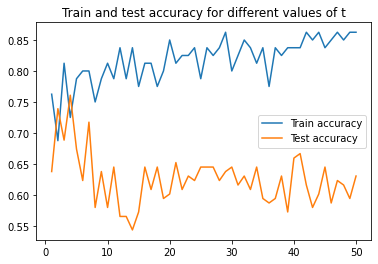

The auc is 0.7390625000000001


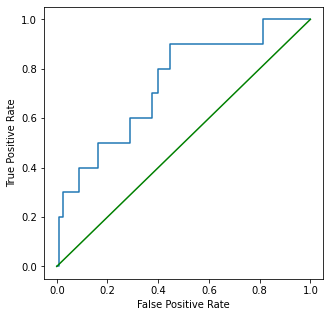

In [ ]:
#@title Bagging with T decision trees after subsampling (under)

# Initiate lists for plotting
t_list = np.arange(1, T+1)
train_score_list, test_score_list = [], []

# Loop over values of t from 1 to T (defined above)
# For each value of t, compute the train and test scores, and update the lists above
for t in t_list:

  # We are using t trees, so n_estimators = t
  clf_bag = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = max_depth),
                              n_estimators = t,
                              max_samples = n_perc).fit(X_train_under, Y_train_under)

  # Update the lists to include scores over the test and training data
  train_score_list.append(clf_bag.score(X_train_under, Y_train_under))
  test_score_list.append(clf_bag.score(X_test, Y_test))

# Print the value of t at the maximum accuracy for test and training data
print(f'\nThe highest training accuracy was {"{:.3f}".format(np.max(train_score_list))}, attained with t = {train_score_list.index(max(train_score_list))}')
print(f'The highest test accuracy was {"{:.3f}".format(np.max(test_score_list))}, attained with t = {test_score_list.index(max(test_score_list))}')

# print('The full range of accuracies is shown in the table below\n')

# Display accuracies in a pandas dataframe
# ar = np.array([t_list, train_score_list, test_score_list])
# columns = ['t', 'Training accuracy', 'Testing accuracy']
# tab = pd.DataFrame(data = np.transpose(ar), columns = columns)
# print(tab)

# Plot the results
plt.plot(t_list, train_score_list, label = 'Train accuracy')
plt.plot(t_list, test_score_list, label = 'Test accuracy')
plt.title('Train and test accuracy for different values of t')
plt.legend()
plt.show()

# ROC_AUC
y_proba=clf_bag.predict_proba(X_test)[:, 1]
auc_undersampled_bag = roc_auc_score(Y_test, clf_bag.predict_proba(X_test)[:, 1])

# Plots the ROC curve using the sklearn methods
plot_sklearn_roc_curve(Y_test, y_proba)
print(f'The auc is {auc_undersampled_bag}')


The highest training accuracy was 1.000, attained with 23 trees
The highest test accuracy was 0.906, attained with 43 trees


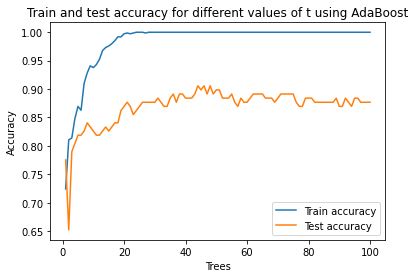

The auc is 0.725


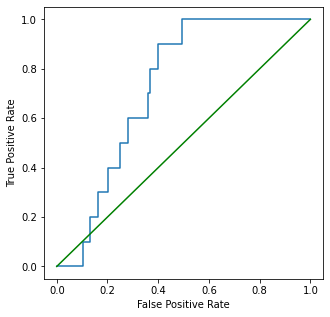

In [ ]:
#@title AdaBoost after correction of dataset imbalance
from sklearn.utils.class_weight import compute_sample_weight

# Correction of dataset imbalance
# Compute the sample weights, weights have only been computed based on the training target values
weights = compute_sample_weight(class_weight='balanced', y=Y_train)
#pd.Series(weights).head(10)

#@title Real AdaBoost with 2T decision trees
train_acc_ada, test_acc_ada = [], []

# use 2T trees, T=50
t_list = np.arange(1,101,1)
for tree in t_list:
  clf_ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = max_depth),
                    n_estimators = tree)
  clf_ada.fit(X_train, Y_train,sample_weight=weights) # KEY STEP for this Exercise

  train_acc_ada.append(clf_ada.score(X_train, Y_train,sample_weight=weights))
  test_acc_ada.append(clf_ada.score(X_test, Y_test))

# Print the number of trees where maximum accuracy was achieved
print(f'\nThe highest training accuracy was {"{:.3f}".format(np.max(train_acc_ada))}, attained with {train_acc_ada.index(max(train_acc_ada))} trees')
print(f'The highest test accuracy was {"{:.3f}".format(np.max(test_acc_ada))}, attained with {test_acc_ada.index(max(test_acc_ada))} trees')

# Plot the results
plt.plot(t_list, train_acc_ada, label = 'Train accuracy')
plt.plot(t_list, test_acc_ada, label = 'Test accuracy')
plt.title('Train and test accuracy for different values of t using AdaBoost')
plt.xlabel('Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ROC_AUC
y_proba=clf_ada.predict_proba(X_test)[:, 1]
auc_weighted_ada = roc_auc_score(Y_test, clf_ada.predict_proba(X_test)[:, 1])

# Plots the ROC curve using the sklearn methods
plot_sklearn_roc_curve(Y_test, y_proba)
print(f'The auc is {auc_weighted_ada}')

In [ ]:
## COMPARISON OF THE AUC FOR DIFFERENT METHODS ##
print(f'AUC score for the Bagging ensemble with imbalanced data: {auc_imbalanced_bag}')
print(f'AUC score for the AdaBoost ensemble with imbalanced data: {auc_imbalanced_ada}')
print(f'AUC score for the Bagging ensemble with oversampled data: {auc_oversampled_bag}')
print(f'AUC score for the Bagging ensemble with undersampled data: {auc_undersampled_bag}')
print(f'AUC score for the AdaBoost ensemble with weighted data: {auc_weighted_ada}')


AUC score for the Bagging ensemble with imbalanced data: 0.76484375
AUC score for the AdaBoost ensemble with imbalanced data: 0.78359375
AUC score for the Bagging ensemble with oversampled data: 0.7660156249999999
AUC score for the Bagging ensemble with undersampled data: 0.7390625000000001
AUC score for the AdaBoost ensemble with weighted data: 0.725


# Discussion of the questions
## Compare the results for the AUC
We obtain better AUC score after balancing the data in the case of the Bagging ensemble. However, we do not see a similar improvement in the AdaBoost ensemble after correction by weighing.

Amongst the over/undersampling methods, the oversampled method worked best. This is because we include more points in our training dataset, having not removed any from the majority class. The lower number of samples in the undersampled class means that this may not generalise well.

## Is this to be expected?
Usually we would expect the unbalanced data to produce some difficulty in correctly classifying both the majority and minority classes, as the minority class is seen as an abnormal case whereas in reality it may not have been. This means that re-balancing the date should in theory give us more accurate results.

Our algorithm rebalances the data to a 50:50 distribution, which may not be representative of the actual data. In this case, it may be expected that the algorithm incorrectly classifies because we have overshot the redistribution of the data.
